# Import Libraries and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
technology = pd.read_csv('./data/reddit_technology_clean.csv')

In [3]:
technology.shape

(3426, 10)

In [4]:
science = pd.read_csv('./data/reddit_science_clean.csv')

In [5]:
science.shape

(4563, 10)

In [6]:
#combined science and technology dataframes
subreddits = pd.read_csv('./data/posts_combined_clean.csv')

In [7]:
subreddits.shape

(7976, 10)

In [8]:
subreddits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subreddit              7976 non-null   object 
 1   title                  7976 non-null   object 
 2   author                 7976 non-null   object 
 3   created_utc            7976 non-null   int64  
 4   upvote_ratio           7976 non-null   float64
 5   full_link              7976 non-null   object 
 6   num_comments           7976 non-null   int64  
 7   num_crossposts         7976 non-null   int64  
 8   total_awards_received  7976 non-null   int64  
 9   score                  7976 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 623.2+ KB


In [9]:
subreddits.head()

,subreddit,title,author,created_utc,upvote_ratio,full_link,num_comments,num_crossposts,total_awards_received,score
0,science,A Climate in Crisis Calls for Investment in Di...,Wagamaga,1610798299,1.0,https://www.reddit.com/r/science/comments/kyhp...,6,0,0,1
1,science,Cureus | Telemedicine: Current Impact on the F...,CureusJournal,1610798085,1.0,https://www.reddit.com/r/science/comments/kyho...,0,0,0,1
2,science,Magnetic reconnection as a mechanism for energ...,m3prx,1610792298,1.0,https://www.reddit.com/r/science/comments/kygi...,2,0,0,1
3,science,Sprinkle of chili compound boosts perovskite s...,MistWeaver80,1610779333,1.0,https://www.reddit.com/r/science/comments/kydw...,2,0,0,1
4,science,Ancient Roman concrete mineral found strengthe...,MistWeaver80,1610778779,1.0,https://www.reddit.com/r/science/comments/kyds...,1,0,0,1


In [10]:
subreddits.describe()

,created_utc,upvote_ratio,num_comments,num_crossposts,total_awards_received,score
count,7.976000e+03,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000
mean,1.607679e+09,0.985410,52.118982,0.014920,0.030717,34.049398
std,2.625036e+06,0.075062,354.039621,0.370922,1.144893,1118.723423
min,1.602634e+09,0.040000,0.000000,0.000000,0.000000,0.000000
25%,1.605122e+09,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.608728e+09,1.000000,2.000000,0.000000,0.000000,1.000000
75%,1.609950e+09,1.000000,4.000000,0.000000,0.000000,1.000000
max,1.610798e+09,1.000000,9985.000000,23.000000,79.000000,59202.000000


In [11]:
science.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subreddit              4563 non-null   object 
 1   title                  4563 non-null   object 
 2   author                 4563 non-null   object 
 3   created_utc            4563 non-null   int64  
 4   upvote_ratio           4563 non-null   float64
 5   full_link              4563 non-null   object 
 6   num_comments           4563 non-null   int64  
 7   num_crossposts         4563 non-null   int64  
 8   total_awards_received  4563 non-null   int64  
 9   score                  4563 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 356.6+ KB


# EDA

### Set X and y

In [12]:
X = subreddits['title']
y = subreddits['subreddit']

In [13]:
X.head()

0    A Climate in Crisis Calls for Investment in Di...
1    Cureus | Telemedicine: Current Impact on the F...
2    Magnetic reconnection as a mechanism for energ...
3    Sprinkle of chili compound boosts perovskite s...
4    Ancient Roman concrete mineral found strengthe...
Name: title, dtype: object

In [14]:
y.head()

0    science
1    science
2    science
3    science
4    science
Name: subreddit, dtype: object

# Build a Classifier

### Science

In [15]:
cvect = CountVectorizer()
X_science = science['title']
X_science_vect = cvect.fit_transform(X_science)
X_science_df = pd.DataFrame(X_science_vect.toarray(), columns = cvect.get_feature_names())
X_science_df.shape

(4563, 12632)

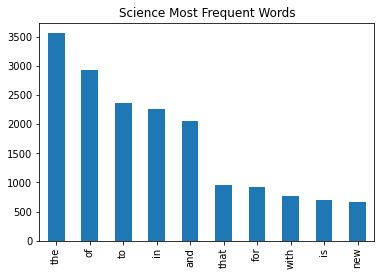

In [16]:
# top words in science dataframe (including stopwords)
X_science_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Science Most Frequent Words');

### Technology

In [17]:
cvect = CountVectorizer()
X_technology = technology['title']
X_technology_vect = cvect.fit_transform(X_technology)
X_technology_df = pd.DataFrame(X_technology_vect.toarray(), columns = cvect.get_feature_names())
X_technology_df.shape

(3426, 8531)

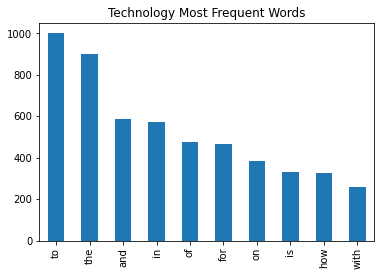

In [18]:
# top words in technology dataframe (including stopwords)
X_technology_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Technology Most Frequent Words');

### Combined (science & technology)

In [19]:
# Countvectorize data
X_vect = cvect.fit_transform(X)

In [20]:
df = pd.DataFrame(X_vect.toarray(), columns = cvect.get_feature_names())

In [21]:
df.head()

,00,000,0000000001,000041,000x,001,002,003,009,01,...,वर,हरण,অন,ইস,𝑵𝒐𝒘,𝑺𝒉𝒂𝒓𝒑,𝑻𝒉𝒊𝒔,𝒊𝒔,𝒏𝒆𝒆𝒅,𝒔𝒐𝒎𝒆𝒕𝒉𝒊𝒏𝒈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(7976, 17395)

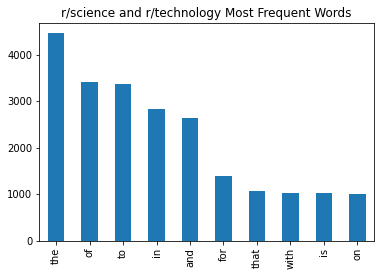

In [23]:
# Top words in both r/science and r/technology dataframes (includes stopwords)
df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('r/science and r/technology Most Frequent Words');

- many of the top words are stopwords

### Stopwords

### Science

In [24]:
cvect_nostopwords = CountVectorizer(stop_words='english')
X_science_nostop = cvect_nostopwords.fit_transform(X_science)
X_science_nostop.shape

(4563, 12376)

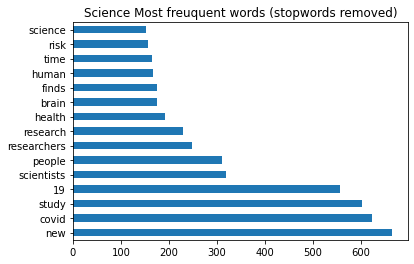

In [25]:
X_science_nostop_df = pd.DataFrame(X_science_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_science_nostop_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.figsize=(20, 20)
plt.title('Science Most freuquent words (stopwords removed)');

In [26]:
X_science_nostop_df.sum().sort_values(ascending=False).head(20)

new            665
covid          624
study          603
19             556
scientists     319
people         311
researchers    248
research       230
health         191
brain          176
finds          175
human          167
time           164
risk           157
science        153
social         151
use            142
likely         137
vaccine        135
years          134
dtype: int64

### Technology

In [27]:
cvect_nostopwords = CountVectorizer(stop_words='english')
X_technology_nostop = cvect_nostopwords.fit_transform(X_technology)
X_technology_nostop.shape

(3426, 8298)

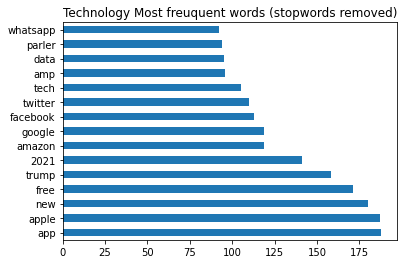

In [28]:
X_technology_nostop_df = pd.DataFrame(X_technology_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_technology_nostop_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.figsize=(20, 20)
plt.title('Technology Most freuquent words (stopwords removed)');

In [29]:
X_technology_nostop_df.sum().sort_values(ascending=False).head(20)

app         188
apple       187
new         180
free        171
trump       158
2021        141
amazon      119
google      119
facebook    113
twitter     110
tech        105
amp          96
data         95
parler       94
whatsapp     92
2020         89
rs           84
best         84
service      83
10           78
dtype: int64

### Combined (r/science and r/technology)

In [30]:
cvect_nostopwords = CountVectorizer(stop_words='english')

In [31]:
X_nostop = cvect_nostopwords.fit_transform(X)

In [32]:
X_nostop.shape

(7976, 17128)

In [33]:
X_vect.shape

(7976, 17395)

- Removed ~200 words

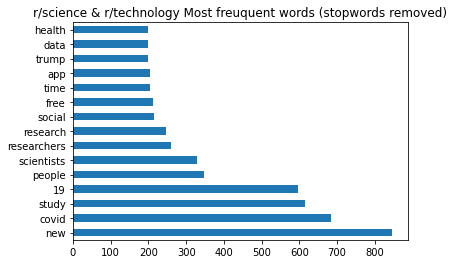

In [34]:
X_nostop_df = pd.DataFrame(X_nostop.toarray(), columns = cvect_nostopwords.get_feature_names())
X_nostop_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.figsize=(20, 20)
plt.title('r/science & r/technology Most freuquent words (stopwords removed)');

### N-Grams (both subreddits combined)

In [35]:
#function to return top words in dataframe
def top_words(X, vect):
    df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
    return df.sum().sort_values(ascending=False).head(10)

In [36]:
top_words(X_nostop, cvect_nostopwords)

new            845
covid          685
study          614
19             597
people         346
scientists     328
researchers    260
research       246
social         216
free           211
dtype: int64

In [37]:
#Count Vectorizer with Bigram
cvect_bigram = CountVectorizer(stop_words='english', max_features=500, ngram_range=(2, 2))
X_bigram = cvect_bigram.fit_transform(X)
top_words(X_bigram, cvect_bigram)

covid 19                   588
new study                  190
sars cov                   124
study finds                103
new research                90
social media                73
climate change              63
19 pandemic                 50
according new               49
artificial intelligence     47
dtype: int64

In [38]:
#Count Vectorizer with Trigram
cvect_trigram = CountVectorizer(stop_words='english', max_features=500, ngram_range=(3, 3))
X_bigram = cvect_trigram.fit_transform(X)
top_words(X_bigram, cvect_trigram)

covid 19 pandemic          50
covid 19 vaccine           38
new study finds            32
covid 19 patients          32
customer service number    29
service number support     28
according new study        22
sars cov infection         22
according new research     20
new study shows            19
dtype: int64